## Supervised Machine Learning Using TensorFlow 2

Supervised learning is the machine learning scenario in which one or more data points from a set of data points is/are associated with a label. The model then learns to predict the labels for unseen data points. For our purposes, each data point will normally be a tensor and will be associated with a label.


## Linear regression

A linear regression problem is one where you have to predict the value of one continuous variable, given the value of one or more other variables (data points); for example, predicting the selling price of a house, given its floor space.

However, linear regression problems may involve several features in which the terminology multiple or multivariate linear regression is used. In this case, it is not a line that best fits the data, but a plane (two features) or a hyperplane (more than two features)


## Our first linear regression example

In [9]:
 import tensorflow as tf
 import numpy as np
 from matplotlib import pyplot as plt


In [10]:
n_examples = 1000 # number of training examples
training_steps = 1000 # number of steps we are going to train for
display_step = 100 # after multiples of this, we display the loss
learning_rate = 0.01 # multiplying factor on gradients
m, c = 6, -5 # gradient and y-intercept of our line, edit these for a different linear problem

In [11]:
def train_data(n, m, c):
    x = tf.random.normal([n]) # n values taken from a normal distribution,
    noise = tf.random.normal([n])# n values taken from a normal distribution
    y = m*x + c + noise # our scatter plot
    return x, y

In [12]:
def prediction(x, weight, bias):
    return weight*x + bias # our predicted (learned) m and c, expression is like y = m*x + c

In [13]:
def loss(x, y, weights, biases): 
    error = prediction(x, weights, biases) - y # how 'wrong' our predicted (learned) y is
    squared_error = tf.square(error)
    return tf.reduce_mean(input_tensor=squared_error) # overall mean of squared error, scalar value.

In [26]:
def grad(x, y, weights, biases):
    with tf.GradientTape() as tape:
         loss_ = loss(x, y, weights, biases)
    return tape.gradient(loss_, [weights, biases]) # direction and value of the gradient of our weights and biases

Initial loss: 65.928


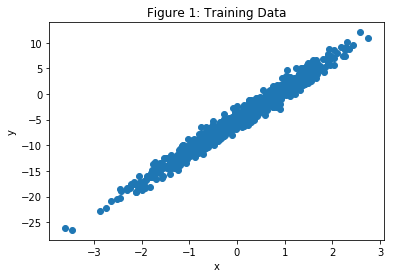

In [27]:
x, y = train_data(n_examples,m,c) # our training values x and y
plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Figure 1: Training Data")
W = tf.Variable(np.random.randn()) # initial, random, value for predicted weight (m)
B = tf.Variable(np.random.randn()) # initial, random, value for predicted bias (c)

print("Initial loss: {:.3f}".format(loss(x, y, W, B)))

In [28]:
for step in range(training_steps): #iterate for each training step
     deltaW, deltaB = grad(x, y, W, B) # direction(sign) and value of the gradients of our loss 
   # with respect to our weights and bias
     change_W = deltaW * learning_rate # adjustment amount for weight
     change_B = deltaB * learning_rate # adjustment amount for bias
     W.assign_sub(change_W) # subract change_W from W
     B.assign_sub(change_B) # subract change_B from B
     if step==0 or step % display_step == 0:
        print("Loss at step {:02d}: {:.6f}".format(step, loss(x, y, W, B)))

   # print(deltaW.numpy(), deltaB.numpy()) # uncomment if you want to see the gradients


Loss at step 00: 63.528343
Loss at step 100: 2.435444
Loss at step 200: 1.015862
Loss at step 300: 0.982756
Loss at step 400: 0.981981
Loss at step 500: 0.981963
Loss at step 600: 0.981963
Loss at step 700: 0.981963
Loss at step 800: 0.981963
Loss at step 900: 0.981963


Final loss: 0.982
W = 6.030852317810059, B = -4.991459369659424
Compared with m = 6.000, c = -5.000  of the original line


Text(0.5, 1.0, 'Figure 2: Line of Best Fit')

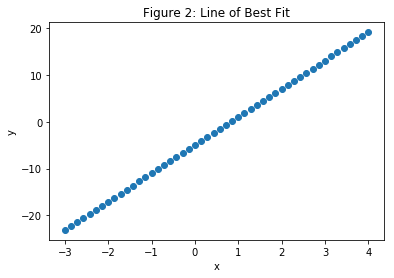

In [29]:
print("Final loss: {:.3f}".format(loss(x, y, W, B)))
print("W = {}, B = {}".format(W.numpy(), B.numpy()))
print("Compared with m = {:.3f}, c = {:.3f}".format(m, c)," of the original line")
xs = np.linspace(-3, 4, 50)
ys = W.numpy()*xs + B.numpy()
plt.scatter(xs,ys)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Figure 2: Line of Best Fit")

## The Boston housing dataset

In [30]:
import tensorflow as tf
from sklearn.datasets import load_boston
from sklearn.preprocessing import scale
import numpy as np

In [31]:
learning_rate = 0.01
epochs = 10000
display_epoch = epochs//20
n_train = 300
n_valid = 100

In [40]:
features, prices = load_boston(True)
n_test = len(features) - n_train - n_valid

# Keep n_train samples for training
train_features = tf.cast(scale(features[:n_train]), dtype=tf.float32) 
print(train_features.shape)
train_prices = prices[:n_train]

# Keep n_valid samples for validation
valid_features = tf.cast(scale(features[n_train:n_train+n_valid]), dtype=tf.float32)
valid_prices = prices[n_train:n_train+n_valid]

# Keep remaining n_test data points as test set)
test_features = tf.cast(scale(features[n_train+n_valid:n_train+n_valid+n_test]), dtype=tf.float32)

test_prices = prices[n_train + n_valid : n_train + n_valid + n_test]

(300, 13)


In [74]:
def prediction1(x, weight, bias):
    return tf.matmul(x, weight) + bias # our predicted (learned) m and c, expression is like y = m*x + c

In [75]:
# A loss function using root mean-squared error
def loss(x, y, weights, bias):
  error = prediction1(x, weights, bias) - y # how 'wrong' our predicted (learned) y is
  squared_error = tf.square(error)
  return tf.sqrt(tf.reduce_mean(input_tensor=squared_error)) # squre root of overall mean of squared error.

In [76]:
# Find the derivative of loss with respect to weight and bias
def gradient(x, y, weights, bias):
  with tf.GradientTape() as tape:
    loss_value = loss(x, y, weights, bias)
  return tape.gradient(loss_value, [weights, bias])# direction and value of the gradient of our weight and bias

In [77]:
# Start with random values for W and B on the same batch of data
W = tf.Variable(tf.random.normal([13, 1], mean=0.0, stddev=1.0, dtype=tf.float32))
B = tf.Variable(tf.zeros(1) , dtype = tf.float32)

print(W,B)
print("Initial loss: {:.3f}".format(loss(train_features, train_prices,W, B)))

<tf.Variable 'Variable:0' shape=(13, 1) dtype=float32, numpy=
array([[ 0.09503774],
       [ 0.10126051],
       [-0.29605243],
       [ 1.653718  ],
       [-1.7405818 ],
       [ 0.86788064],
       [-0.84093213],
       [ 0.9045425 ],
       [-1.4743229 ],
       [-0.5075275 ],
       [ 1.091866  ],
       [ 0.38238388],
       [ 2.3471932 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>
Initial loss: 27.300


In [78]:
for e in range(epochs): #iterate for each training epoch
    deltaW, deltaB = gradient(train_features, train_prices, W, B) # direction (sign) and value of the gradient of our weight and bias
    change_W = deltaW * learning_rate # adjustment amount for weight
    change_B = deltaB * learning_rate # adjustment amount for bias
    W.assign_sub(change_W) # subract from W
    B.assign_sub(change_B) # subract from B
    if e==0 or e % display_epoch == 0:
        # print(deltaW.numpy(), deltaB.numpy()) # uncomment if you want to see the gradients
        print("Validation loss after epoch {:02d}: {:.3f}".format(e, loss(valid_features, valid_prices, W, B)))

Validation loss after epoch 00: 23.092
Validation loss after epoch 500: 18.793
Validation loss after epoch 1000: 15.017
Validation loss after epoch 1500: 11.969
Validation loss after epoch 2000: 10.005
Validation loss after epoch 2500: 9.256
Validation loss after epoch 3000: 9.299
Validation loss after epoch 3500: 9.574
Validation loss after epoch 4000: 9.821
Validation loss after epoch 4500: 9.989
Validation loss after epoch 5000: 10.091
Validation loss after epoch 5500: 10.151
Validation loss after epoch 6000: 10.184
Validation loss after epoch 6500: 10.202
Validation loss after epoch 7000: 10.212
Validation loss after epoch 7500: 10.216
Validation loss after epoch 8000: 10.218
Validation loss after epoch 8500: 10.219
Validation loss after epoch 9000: 10.219
Validation loss after epoch 9500: 10.219


In [80]:
example_house = 69
y = test_prices[example_house]
y_pred = prediction1(test_features,W.numpy(),B.numpy())[example_house]
print("Actual median house value",y," in $10K")
print("Predicted median house value ",y_pred.numpy()," in $10K")

Actual median house value 20.1  in $10K
Predicted median house value  [25.6427]  in $10K
